<h1 align = center>Análise das Vendas Online</h1>

<h2>Definindo métricas</h2>

<p>Uma boa análise de dados é responsável por responder perguntas que gerem valor. Por isso, vamos começar definindo as perguntas que queremos responder com a nossa análise.</p>

<ol>
    <li>Quais são os top 5 produtos mais vendidos em termos de quantidade e em termos de faturamento?</li>
    <li>Existe correlação entre preço unitário e quantidade vendida (produtos mais caros vendem menos)?</li>
    <li>Qual categoria gera maior receita total e qual gera maior volume de vendas?</li>
    <li>Quais clientes compram com mais frequência?</li>
    <li>Como se distribui o faturamento por estado?</li>
    <li>Qual método de pagamento é mais utilizado e qual gera maior receita?</li>
</ol>

<h2>Importando as libs e carregando o dataframe</h2>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("vendas_online_tratada.parquet")

In [4]:
df.head()

,ID_Pedido,Data_Venda,Nome_Produto,Categoria,Quantidade,Preco_Unitario,Valor_Total,Nome_Cliente,Estado,Email,Metodo_Pagamento
0,01a193ef-60a9-4aa6-8d51-50c61589cc0a,2022-08-10,Camiseta Básica,Roupas,1,1202.560059,1202.560059,Patrícia Ferreira,PA,patrícia.ferreira@teste.br,PIX
1,4ae8427f-14ed-4bff-9bbf-5e6f53e9085e,2024-09-13,Bicicleta Mountain Bike,Esportes e lazer,2,2606.709961,5213.419922,Bruno Santos,AM,bruno.santos@web.org,PIX
2,9a734f36-017e-4af7-af06-60f8e7f727b9,2022-09-24,Poemas ao Luar,Livros,3,1126.250000,3378.750000,Ana Almeida,MA,Desconhecido,Boleto Bancário
3,05a2909d-c14e-4262-9a24-c0b02330a275,2022-07-24,Cozinha para Iniciantes,Livros,4,362.309998,1449.239990,Patrícia Mendes,SE,patrícia.mendes@email.com,PayPal
4,d09281ba-b013-4f1c-888a-71987c865733,2024-03-06,Vestido Floral,Roupas,1,359.890015,359.890015,Carlos Mendes,RS,carlos.mendes@teste.br,PIX


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Pedido         10500 non-null  string        
 1   Data_Venda        10500 non-null  datetime64[ns]
 2   Nome_Produto      10500 non-null  category      
 3   Categoria         10500 non-null  category      
 4   Quantidade        10500 non-null  uint8         
 5   Preco_Unitario    10500 non-null  float32       
 6   Valor_Total       10500 non-null  float32       
 7   Nome_Cliente      10500 non-null  string        
 8   Estado            10500 non-null  category      
 9   Email             10500 non-null  string        
 10  Metodo_Pagamento  10500 non-null  category      
dtypes: category(4), datetime64[ns](1), float32(2), string(3), uint8(1)
memory usage: 464.0 KB


<h2>Quais são os top 5 produtos mais vendidos em termos de quantidade e em termos de faturamento?</h2>

In [51]:
df_agregado = df.groupby("Nome_Produto", observed = False).agg({
    "Preco_Unitario": "median",
    "Quantidade": "sum",
    "Valor_Total": "sum"
}).sort_values(by = ["Quantidade", "Valor_Total"],ascending = False).reset_index()

df_agregado.head()

,Nome_Produto,Preco_Unitario,Quantidade,Valor_Total
0,Moletom com Capuz,2450.639893,1357,3344197.50
1,Aventuras em Marte,2451.919922,1333,3339318.25
2,Liquidificador Turbo,2374.510010,1318,3131339.50
3,Calça Jeans Slim,2535.760010,1315,3273708.25
4,História da Arte,2475.495117,1306,3362609.50


<h2>Existe correlação entre preço unitário e quantidade vendida (produtos mais caros vendem menos)?</h2>

Text(0.5, 1.0, 'Mapa de calor entre as variáveis numéricas')

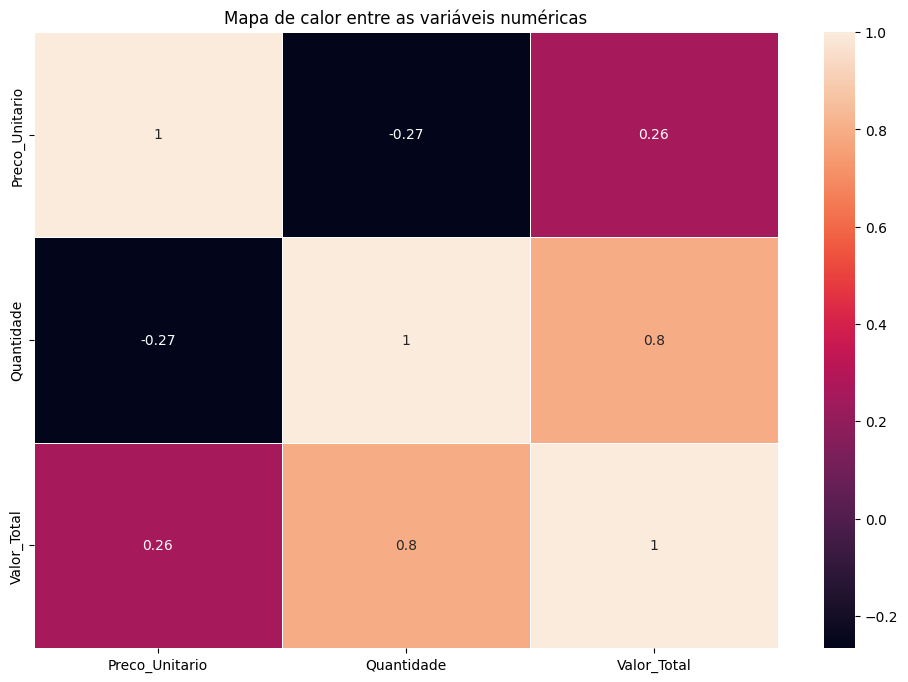

In [53]:
correlacao = df_agregado.corr(numeric_only = True)

plt.figure(figsize = (12, 8))

sns.heatmap(correlacao, annot = True, linewidths=0.5).set_title("Mapa de calor entre as variáveis numéricas")

<ul>
    <li>
        Como podemos ver atráves do mapa de calor a correlação entre Preço Unitário e Quantidade vendida é negativa fraca, ou seja, quanto maior o preço unitário menor será a quantidade vendida
    </li>
</ul>

<h2>Qual categoria gera maior receita total e qual gera maior volume de vendas?</h2>

In [71]:
df_agregado = df.groupby("Categoria", observed = False).agg({
    "Preco_Unitario": "mean",
    "Quantidade": "sum",
    "Valor_Total": "sum"
}).sort_values(by = ["Quantidade", "Valor_Total"],ascending = False).reset_index()

max_valor_total = df_agregado.loc[df_agregado["Valor_Total"] == df_agregado["Valor_Total"].max()]
max_quantidade = df_agregado.loc[df_agregado["Quantidade"] == df_agregado["Quantidade"].max()]

pd.concat([max_valor_total, max_quantidade])

,Categoria,Preco_Unitario,Quantidade,Valor_Total
0,Livros,2513.343994,6409,16031834.0
0,Livros,2513.343994,6409,16031834.0


<ul>
    <li>
        Vemos a mesma categoria repetida porque a categoria de livros apresenta tanto o maior volume de vendas quanto a maior receita gerada.
    </li>
</ul>

<h2>Quais clientes compram com mais frequência?</h2>

In [86]:
df["Nome_Cliente"].value_counts().sort_values(ascending = False).head().to_frame().reset_index()

,Nome_Cliente,count
0,Eduardo Santos,43
1,Valentina Pereira,42
2,Kaique Castro,42
3,Helena Dias,40
4,Thiago Silva,40


<h2>
    Como se distribui o faturamento por estado?
</h2>

In [98]:
df_agregado = df.groupby("Estado", observed = False)["Valor_Total"].sum()
df_agregado.sort_values(ascending = False).reset_index()

,Estado,Valor_Total
0,MA,3098956.50
1,AP,3069084.50
2,RR,3059148.00
3,AC,3046126.00
4,AL,2951680.25
5,SE,2943793.50
6,CE,2922775.50
7,RN,2895591.25
8,PA,2886740.25
9,DF,2885871.25


<h2>Qual método de pagamento é mais utilizado e qual gera maior receita?</h2>

In [116]:
pagamentos = (
    df.groupby("Metodo_Pagamento", observed=False)
      .agg(Frequencia=("Metodo_Pagamento", "count"),
           Valor_Total=("Valor_Total", "sum"))
      .sort_values(by="Frequencia", ascending=False)
      .reset_index()
)

pagamentos["Frequência %"] = (pagamentos["Frequencia"] / pagamentos["Frequencia"].sum() * 100).round(2)

pagamentos

,Metodo_Pagamento,Frequencia,Valor_Total,Frequência %
0,Boleto Bancário,2144,1.642035e+07,20.42
1,Transferência Bancária,2076,1.531818e+07,19.77
2,PIX,2036,1.485108e+07,19.39
3,Cartão de Crédito,2029,1.526574e+07,19.32
4,PayPal,2005,1.489405e+07,19.10
5,Desconhecido,210,1.662371e+06,2.00
